# 霍夫变换

- 导入相关库

In [195]:
import numpy as np
import cv2 as cv
import zhplot
import matplotlib.pyplot as plt

zhplot.matplotlib_chineseize()

## 霍夫线检测

- 原图展示

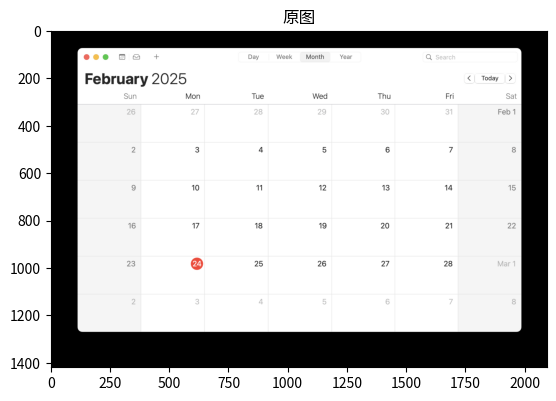

In [196]:
image = cv.imread('./images/calendar.png', cv.IMREAD_COLOR)
plt.title('原图')
plt.imshow(image[:, :, ::-1])

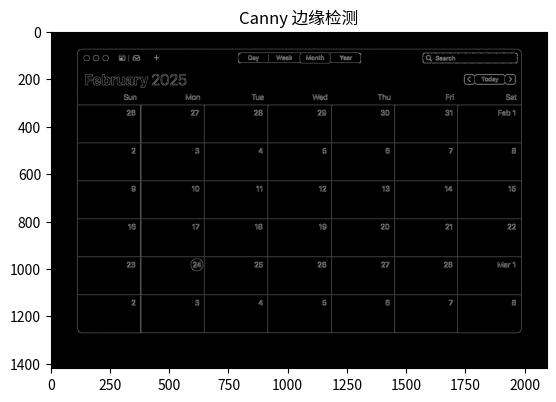

In [197]:
image = cv.imread('./images/calendar.png', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(image, 0, 50)
plt.title('Canny 边缘检测')
plt.imshow(edges, cmap='gray')

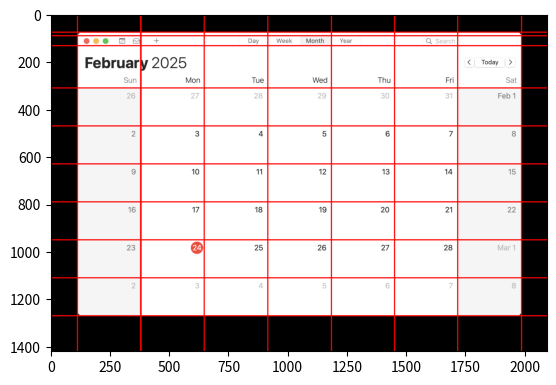

In [198]:
image = cv.imread('./images/calendar.png', cv.IMREAD_COLOR)
lines = cv.HoughLines(edges, 1, np.pi / 180, 300)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 3000 * (-b))
    y1 = int(y0 + 3000 * a)
    x2 = int(x0 - 3000 * (-b))
    y2 = int(y0 - 3000 * a)
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
plt.imshow(image[:, :, ::-1])

## 霍夫圆检测

- 原图展示

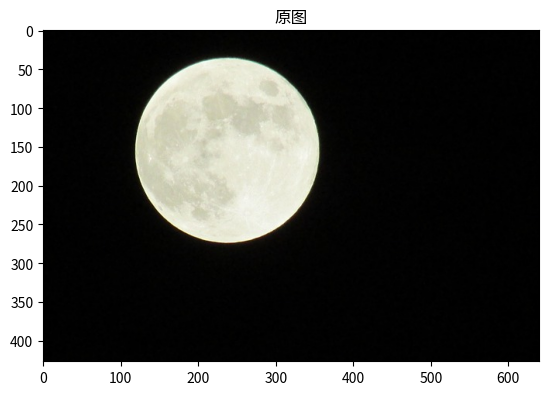

In [199]:
image = cv.imread('./images/moon.jpg', cv.IMREAD_COLOR)
plt.title('原图')
plt.imshow(image[:, :, ::-1])

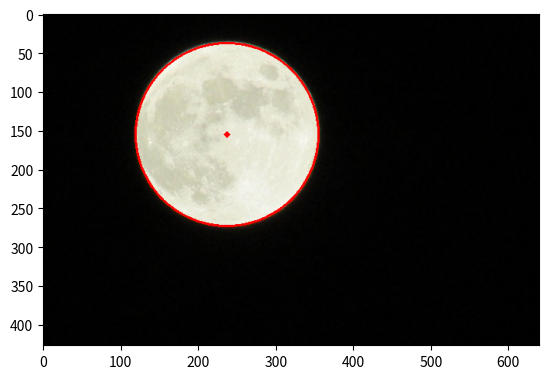

In [200]:
image_gray = cv.imread('./images/moon.jpg', cv.IMREAD_GRAYSCALE)
circles = cv.HoughCircles(image_gray, cv.HOUGH_GRADIENT, 1, 100, param1=30, param2=110, minRadius=80, maxRadius=150)
for circle in circles[0,:]:
    cv.circle(image, (int(circle[0]), int(circle[1])), int(circle[2]), (0, 0, 255), 2)
    cv.circle(image, (int(circle[0]), int(circle[1])), 2, (0, 0, 255), 3)
plt.imshow(image[:, :, ::-1])